# Boston Housing

### Load data

In [ ]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

### Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

grid_dt = {
    'max_depth': range(1, X_train.shape[1] + 1, 5)
}

grid_rf = {
    'max_depth': range(1, X_train.shape[1] + 1, 5)
}

grid_gb = {
    'max_depth': range(1, X_train.shape[1] + 1, 5)
}

models_name = [
    "Decision Tree", 
    "Random Forest", 
    "Gradient Boosting"
]

grids = [
    grid_dt, 
    grid_rf, 
    grid_gb
]

models = [
    # Bayesian Regression TODO,
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
]

cv = 5

In [ ]:
from sklearn.model_selection import GridSearchCV
from utils import grid_search_by_hand, model_evaluation_lr
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

results_gs = pd.DataFrame(columns=["Model", "MAPE", "RMSE", "r2"])
results_hand = pd.DataFrame(columns=["Model", "MAPE", "RMSE", "r2"])
models_gs_sc = {}
models_gs = {}

for i, (model_name, model, grid) in enumerate(zip(models_name, models, grids)):
    gs_sc = GridSearchCV(model, param_grid=grid, scoring='r2', cv=cv, n_jobs=-1)
    gs = GridSearchCV(model, param_grid=grid, scoring='r2', cv=cv, n_jobs=-1)
    hand_sc = grid_search_by_hand(deepcopy(model), grid, X_train_sc, y_train, cv, 'r2')
    hand = grid_search_by_hand(deepcopy(model), grid, X_train, y_train, cv, 'r2')

    gs_sc.fit(X_train_sc, y_train)
    gs.fit(X_train, y_train)
    models_gs[model_name] = gs
    models_gs_sc[model_name + ' (sc)'] = gs_sc
    hand_sc['best_model'].fit(X_train_sc, y_train)
    hand['best_model'].fit(X_train, y_train)

    eval_gs_sc = model_evaluation_lr(gs_sc, X_test_sc, y_test)
    eval_gs = model_evaluation_lr(gs, X_test, y_test)
    eval_hand_sc = model_evaluation_lr(hand_sc['best_model'], X_test_sc, y_test)
    eval_hand = model_evaluation_lr(hand['best_model'], X_test, y_test)

    results_gs.loc[2*i] = [model_name, eval_gs['mape'], eval_gs['rmse'], eval_gs['r2']]
    results_gs.loc[2*i+1] = [model_name + ' (sc)', eval_gs_sc['mape'], eval_gs_sc['rmse'], eval_gs_sc['r2']]
    results_hand.loc[2*i] = [model_name, eval_hand['mape'], eval_hand['rmse'], eval_hand['r2']]
    results_hand.loc[2*i+1] = [model_name + ' (sc)', eval_hand_sc['mape'], eval_hand_sc['rmse'], eval_hand_sc['r2']]

results_gs = results_gs.sort_values(by='r2', ascending=False)
results_hand = results_hand.sort_values(by='r2', ascending=False)

100%|██████████| 21/21 [02:22<00:00,  6.77s/it]


## Results

### With GridSearch

In [ ]:
print(results_gs.to_string(index=False))

                 Model     MAPE  RMSE    r2
    Random Forest (sc) 0.103374 3.150 0.867
         Random Forest 0.103314 3.177 0.865
    Decision Tree (sc) 0.136916 3.723 0.814
     Gradient Boosting 0.129228 3.754 0.811
Gradient Boosting (sc) 0.129228 3.754 0.811
         Decision Tree 0.146741 4.167 0.767


### By hand

In [ ]:
print(results_hand.to_string(index=False))

                 Model     MAPE  RMSE    r2
    Random Forest (sc) 0.103374 3.150 0.867
         Random Forest 0.103314 3.177 0.865
    Decision Tree (sc) 0.136916 3.723 0.814
     Gradient Boosting 0.129228 3.754 0.811
Gradient Boosting (sc) 0.129228 3.754 0.811
         Decision Tree 0.146741 4.167 0.767


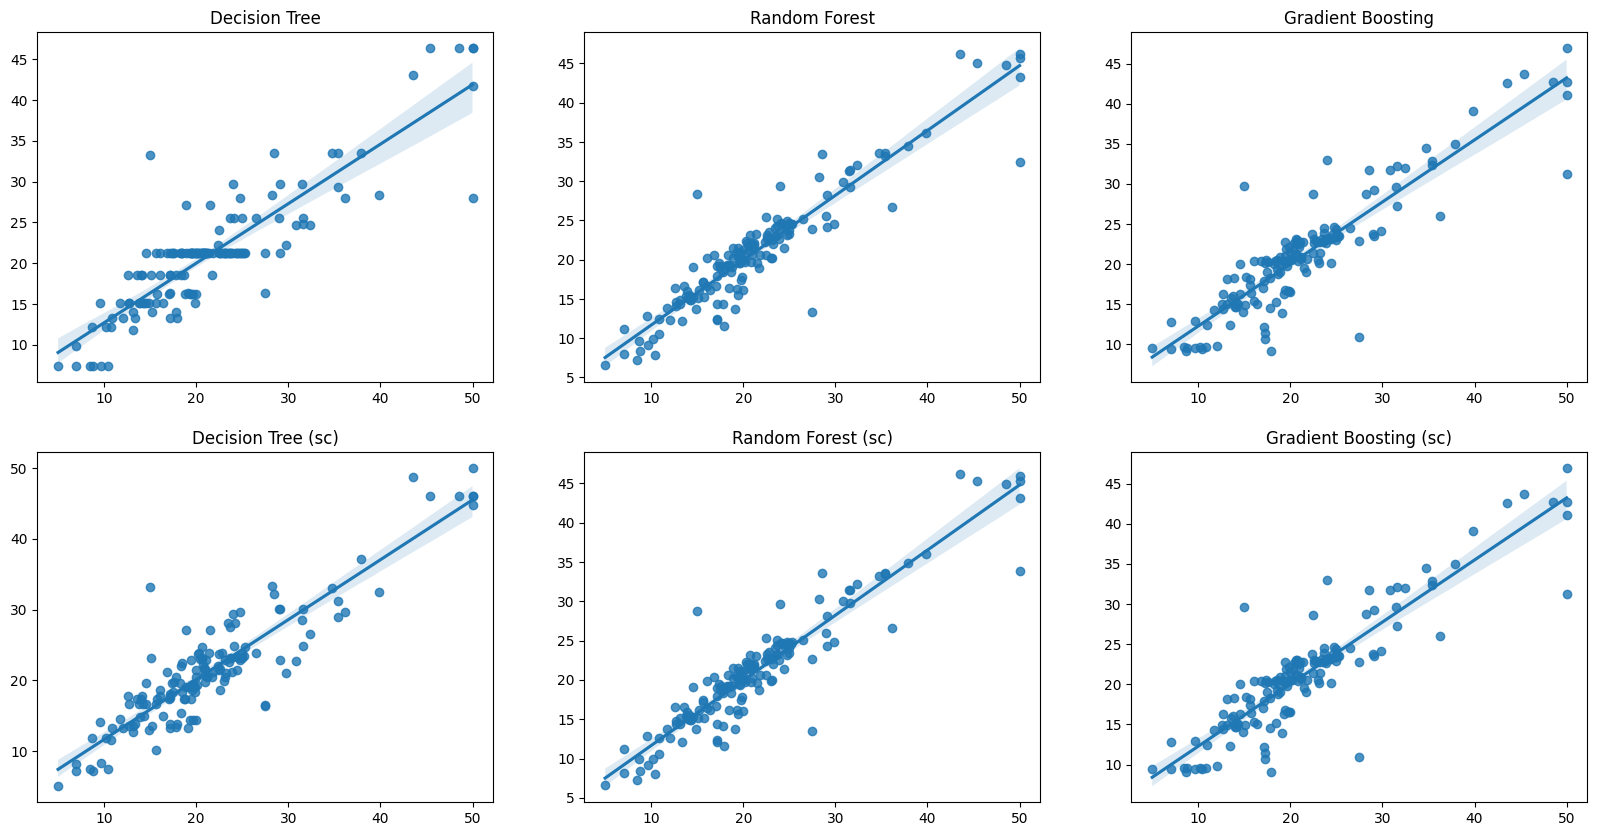

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, model_name in enumerate(models_gs.keys()):
    model = models_gs[model_name]
    y_pred = model.predict(X_test)
    sns.regplot(x=y_test, y=y_pred, ax=axs[0, i])
    axs[0, i].set_title(model_name)

for i, model_name in enumerate(models_gs_sc.keys()):
    model = models_gs_sc[model_name]
    y_pred = model.predict(X_test_sc)
    sns.regplot(x=y_test, y=y_pred, ax=axs[1, i])
    axs[1, i].set_title(model_name)

plt.show()